In [3]:
%matplotlib inline
import pandas as pd

In [4]:
data=pd.read_csv('food_truck.txt')

In [5]:
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [6]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [7]:
data[data['Profit']>24].head()

,Population,Profit
29,22.203,24.147


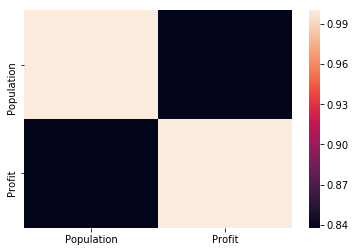

In [8]:
import seaborn as sns
corr = data.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [9]:
corr

,Population,Profit
Population,1.000000,0.837873
Profit,0.837873,1.000000


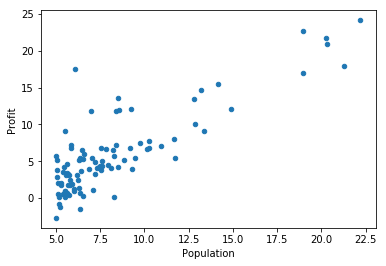

In [10]:
data.plot(x='Population',y='Profit',kind='scatter')

In [11]:
from sklearn import linear_model

In [12]:
model=linear_model.LinearRegression()

In [13]:
data.Population.shape

(97,)

In [14]:
data.shape[1]

2

In [15]:
model.fit(data['Population'].values.reshape(data.shape[0],1),data['Profit'].values)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [16]:
model.coef_

array([1.19303364])

In [17]:
model.intercept_

-3.895780878311852

In [23]:
y = 1.19303364*x -3.8957808783118519

In [19]:
predict = model.predict(data['Population'].values.reshape(data.shape[0],1))

In [20]:
predict

array([ 3.39377399,  2.6989512 ,  6.26719552,  4.45927234,  3.09515767,
        6.10530086,  5.02381586,  6.33818102,  3.84247394,  2.13452698,
        2.91727635, 13.00234766,  2.94507404,  6.13572322,  2.833764  ,
        2.52202431,  3.69835548,  2.22460102,  3.77494824,  4.53992141,
        3.48802365, 20.28701109,  2.65409313,  3.65146926,  2.74333205,
       18.70624151, 11.40845471,  9.17628876, 11.82363042, 22.59314512,
        2.37050903,  3.96559502,  7.13763287,  3.13333475,  5.90033768,
        5.56903223,  5.7629002 ,  2.79272364, 11.41799898,  3.68403908,
        2.55483273,  4.31527318, 10.07225703,  2.99243747,  5.43934948,
        4.56652606,  2.1531383 ,  3.02548451, 10.06271276,  2.71553436,
        5.09993141,  2.43648379,  4.96118159,  5.17497322,  3.65946258,
        3.69060076,  3.58955081,  2.83257096,  7.21160096,  7.38268198,
        6.63321825,  2.28329828, 21.49078204, 13.88996469, 18.72294398,
        4.71577457,  6.0005525 ,  8.3161115 ,  2.66518834, 20.37

In [21]:
x=8.2

In [24]:
y

5.887094969688146

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
train,test = train_test_split(data, test_size=0.2, random_state=42)

In [27]:
train.shape

(77, 2)

In [28]:
test.shape

(20, 2)

In [29]:
model2 = linear_model.LinearRegression()

In [30]:
model2.fit(train['Population'].values.reshape(train.shape[0],1),train['Profit'].values)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [31]:
model2.coef_

array([1.28752876])

In [32]:
model2.intercept_

-4.732397595806337

In [33]:
predict_test = model2.predict(test['Population'].values.reshape(test.shape[0],1))

In [34]:
predict_test

array([22.66492686,  2.22914165,  2.09845748,  3.54589731,  1.94781662,
        7.84508459, 19.67786014, 10.34198911,  2.62029289,  3.13453187,
        3.75164441,  3.69821196,  2.73707175, 11.78402132,  5.34212868,
        2.81226342,  2.33626404,  2.65029231,  1.78172541,  4.57115646])

In [35]:
from sklearn.metrics import mean_squared_error

In [36]:
mean_squared_error(test['Profit'], predict_test)

15.709362447765187

In [37]:
mean_squared_error(data['Profit'], predict)

8.953942751950358

In [38]:
predict_train = model2.predict(train['Population'].values.reshape(train.shape[0],1))

In [39]:
mean_squared_error(train['Profit'], predict_train)

7.371424850864133

In [40]:
import matplotlib.pyplot as plt
import numpy as np

Text(0.5,1,'Predicted Profit vs. Population Size')

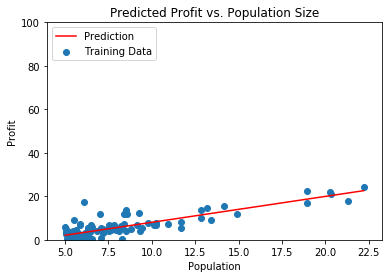

In [41]:
x = np.linspace(data.Population.min(), data.Population.max(), 100)  
f = model.intercept_ + model.coef_*x

fig, ax = plt.subplots()  
ax.plot(x, f, 'r', label='Prediction')  
ax.scatter(data.Population, data.Profit, label='Training Data')  

ax.set_ylim(0,100)
ax.legend(loc=2)  
ax.set_xlabel('Population')  
ax.set_ylabel('Profit')  
ax.set_title('Predicted Profit vs. Population Size')  

# Show a cross validation

In [42]:
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt

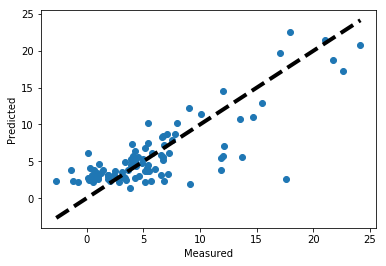

In [43]:
lr = linear_model.LinearRegression()
y=data.Profit.values
predicted = cross_val_predict(lr, data.Population.values.reshape(data.shape[0],1), data.Profit, cv=10)

fig, ax = plt.subplots()
ax.scatter(y, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [44]:
mean_squared_error(data.Profit,predicted)

10.51755123134504

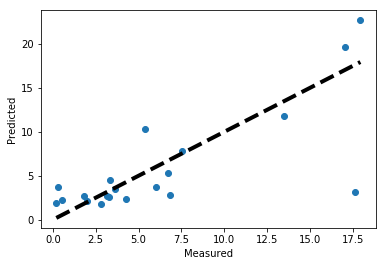

In [45]:
fig, ax = plt.subplots()
y= test.Profit.values
ax.scatter(y, predict_test)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()